# Exploratory Data Analysis

## Implementing on Iris Flower Dataset
- downlaod iris.csv from [here](https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv)


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("datasets/iris.csv")

In [3]:
# Answers to few questions 

## What is the shape of our dataset?
print(f"Shape: {iris.shape}")

## What are the column names in our dataset?
print(f"\nColumn names:\n{iris.columns}")

## How many data points for each class are present? 
## (or) How many flowers for each species are present?
print(f"\nData points per class: \n{iris['species'].value_counts()}")

Shape: (150, 5)

Column names:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Data points per class: 
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


## Plotting

### scatter plot (2D) 

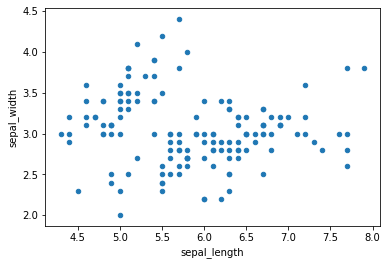

In [4]:
#2-D scatter plot:

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

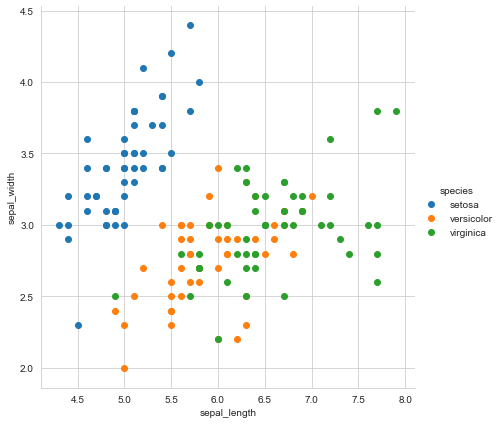

In [5]:
# Above plot does not make much sense. 
# What if we color the points by thier class-label/flower-type.


# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height=6) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

- Notice that the blue points can be easily seperated from red and green by drawing a line. But red and green data points cannot be easily seperated. 
- Can we draw multiple 2-D scatter plots for each combination of features? How many cobinations exist? 4C2 = 6.

**Observations**
1. Using `sepal_length` and `sepal_width` features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

### Pair-plot

Dis-advantages: 
- Can be used when number of features are high.
- Cannot visualize higher dimensional patterns in 3-D and 4-D. 
- Only possible to view 2D patterns.

> dont use pair-plot if you have more than 6 features

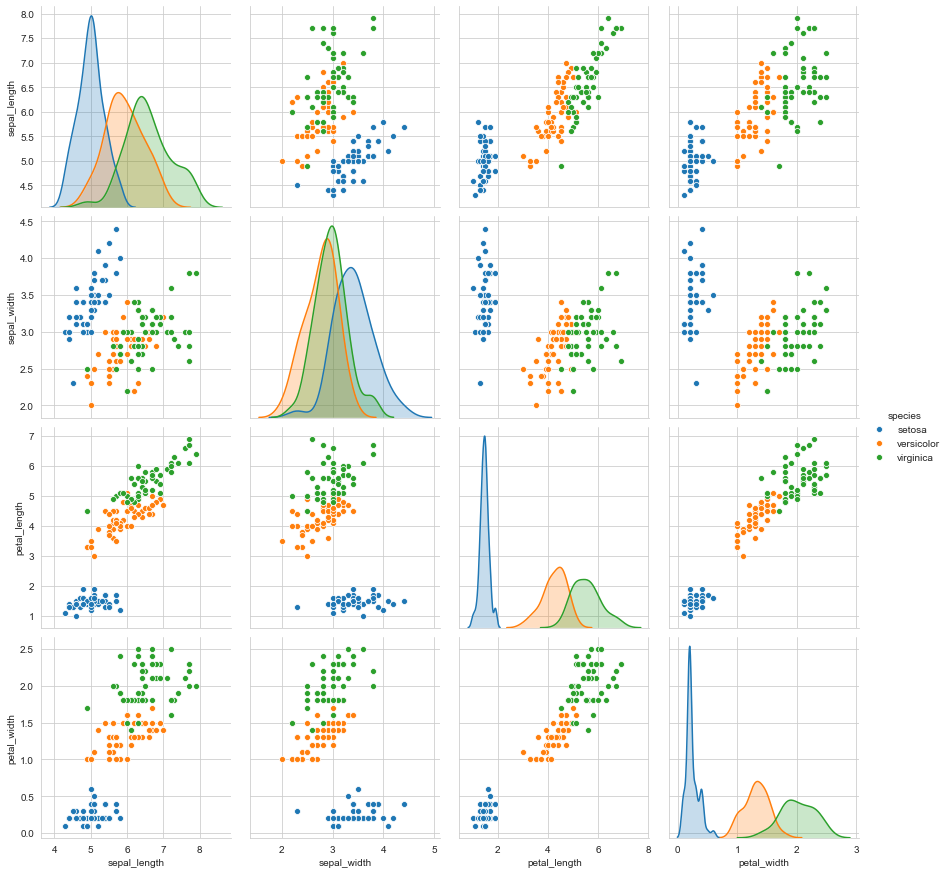

In [6]:
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=3);
plt.show()

**Observations**
1. `petal_length` and `petal_width` are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

### Histogram (PDF, CDF)

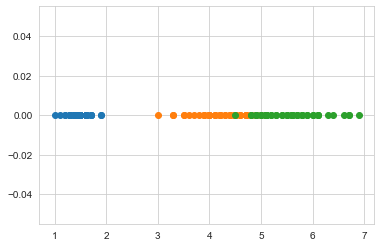

In [7]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length

iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

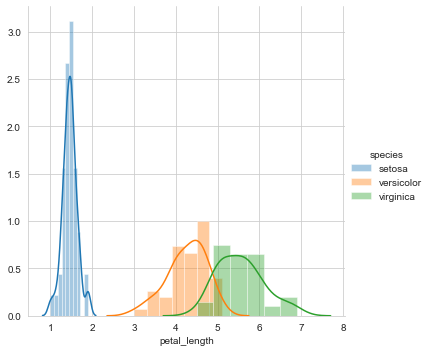

In [8]:
sns.FacetGrid(iris, hue='species', height=5).map(sns.distplot,
        'petal_length').add_legend()
plt.show()

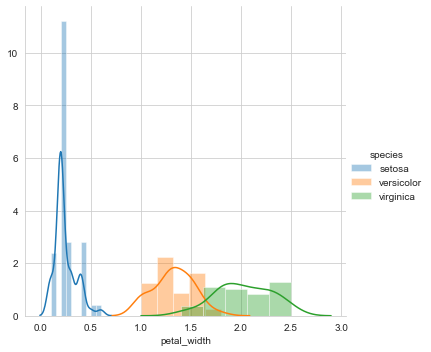

In [9]:
sns.FacetGrid(iris, hue='species', height=5).map(sns.distplot,
        'petal_width').add_legend()
plt.show()

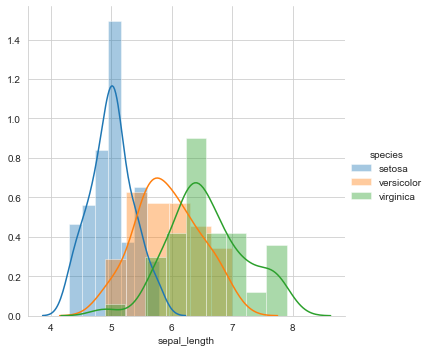

In [10]:
sns.FacetGrid(iris, hue='species', height=5).map(sns.distplot,
        'sepal_length').add_legend()
plt.show()

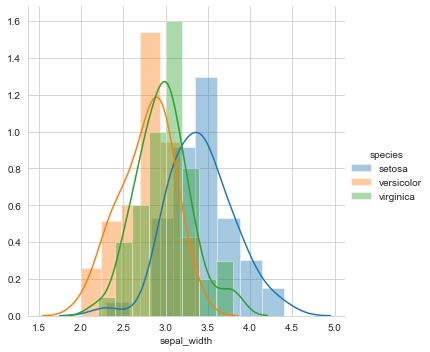

In [11]:
sns.FacetGrid(iris, hue='species', height=5).map(sns.distplot,
        'sepal_width').add_legend()
plt.show()

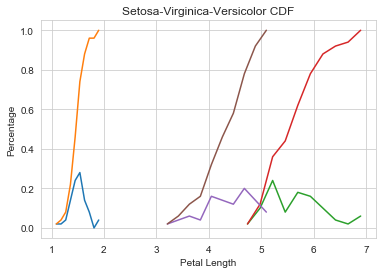

In [12]:
# Plots of CDF of petal_length for various types of flowers.
# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.ylabel('Percentage')
plt.xlabel('Petal Length')
plt.title("Setosa-Virginica-Versicolor CDF")
plt.show();

## Descriptive stats

In [13]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


## Box Plot and Whiskers


- Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
- The Concept of median, percentile, quantile.


> How to draw whiskers: "no standard way", Could use min and max or use other complex statistical techniques (like IQR)

**NOTE:** IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. Whiskers in the plot below donot correposnd to the min and max values.

- Box-plot can be visualized as a PDF on the side-ways.

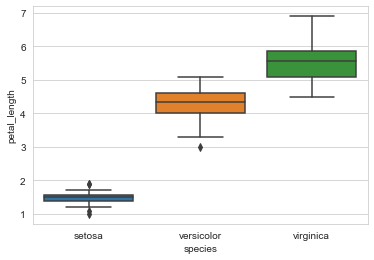

In [14]:
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

### Violin plot

- A violin plot combines the benefits of the histogram/pdf and Box plot

- Denser regions of the data are fatter, and sparser ones thinner in a violin plot

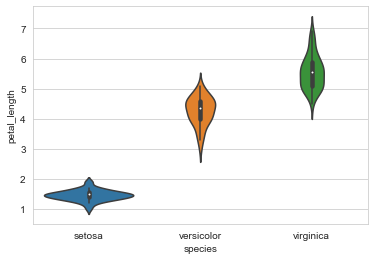

In [15]:
sns.violinplot(x="species", y="petal_length", data=iris, height=8)
plt.show()

### Contors plot/ Densoty plot 

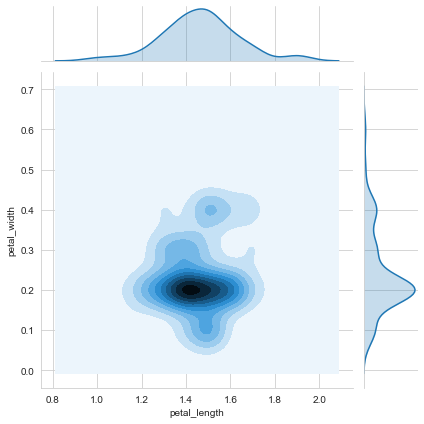

In [16]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();

In [17]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]


# KS test is used to check similarity between two distributions
from scipy.stats import ks_2samp

ks_2samp(iris_virginica_SW, iris_versicolor_SW)

Ks_2sampResult(statistic=0.26, pvalue=0.06779471096995852)